In [1]:
from flux.datasets.vision.celeba import CelebA
import tensorflow as tf

tf.enable_eager_execution()


[Flux] Initializing...


In [2]:
data = CelebA(force_build=True)

[Flux] Retrieving CelebA data
[Flux] Downloading img_align_celeba.zip
File already exists
[Flux] Decompressing: /home/karen/extern/.flux/work/img_align_celeba.zip
[Flux] Decompressed img_align_celeba.zip to /home/karen/extern/.flux/work/img_align_celeba
[Flux] Completed img_align_celeba.zip
[Flux] Downloading list_attr_celeba.txt


816it [00:12, 65.76it/s]


[Flux] Decompressed list_attr_celeba.txt to /home/karen/extern/.flux/work/list_attr_celeba.txt
[Flux] Completed list_attr_celeba.txt
[Flux] Extracting CelebA data...
[Flux] Extracting CelebA labels first


  0%|          | 126/162079 [00:00<02:09, 1253.68it/s]

[Flux] Building train dataset...


  1%|          | 130/20259 [00:00<00:15, 1289.72it/s]

[Flux] Building val dataset...


100%|██████████| 20259/20259 [00:16<00:00, 1193.69it/s]


[Flux] Built Complete


Black_Hair , Double_Chin , Male , Narrow_Eyes , Oval_Face , Rosy_Cheeks , Smiling , Young


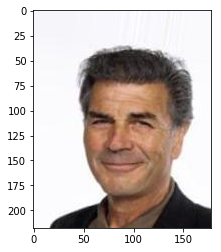

Attractive , Bald , Blond_Hair , Bushy_Eyebrows , Narrow_Eyes , Oval_Face , Receding_Hairline , Straight_Hair , Wearing_Earrings


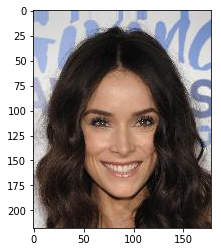

Blond_Hair , Mouth_Slightly_Open , Narrow_Eyes , Receding_Hairline , Straight_Hair , Wearing_Necklace , Young


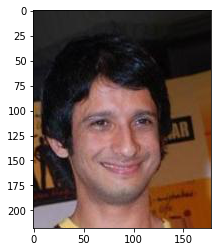

Bags_Under_Eyes , Chubby , Mouth_Slightly_Open , Narrow_Eyes , Rosy_Cheeks , Smiling , Wearing_Earrings , Young


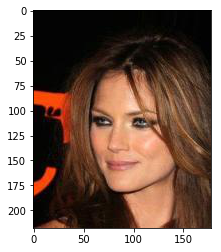

Bald , Big_Nose , Double_Chin , Narrow_Eyes , Pale_Skin , Sideburns , Wearing_Earrings , Young


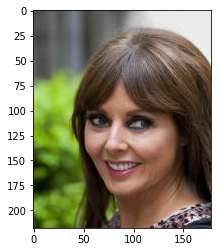

In [4]:
import matplotlib.pyplot as plt
import numpy as np
train_db = data.train_db.shuffle(
    buffer_size=3000).repeat().batch(1)
train_iterator = tf.contrib.eager.Iterator(train_db)
d = data.idx2attr
# Train the model
for iteration in range(5):
    label, img = next(train_iterator)
    im = np.squeeze(img.numpy())
    label = label.numpy()
    label = np.squeeze(np.where(label==1.)[1])
    print(" , ".join([d[i] for i in label]))
    plt.imshow(im)
    plt.show()
    
